## notebook to pull Alpha Vantage share prices from API
## and plot in Bokeh
https://medium.com/alpha-vantage/get-started-with-alpha-vantage-data-619a70c7f33a
https://github.com/RomelTorres/alpha_vantage

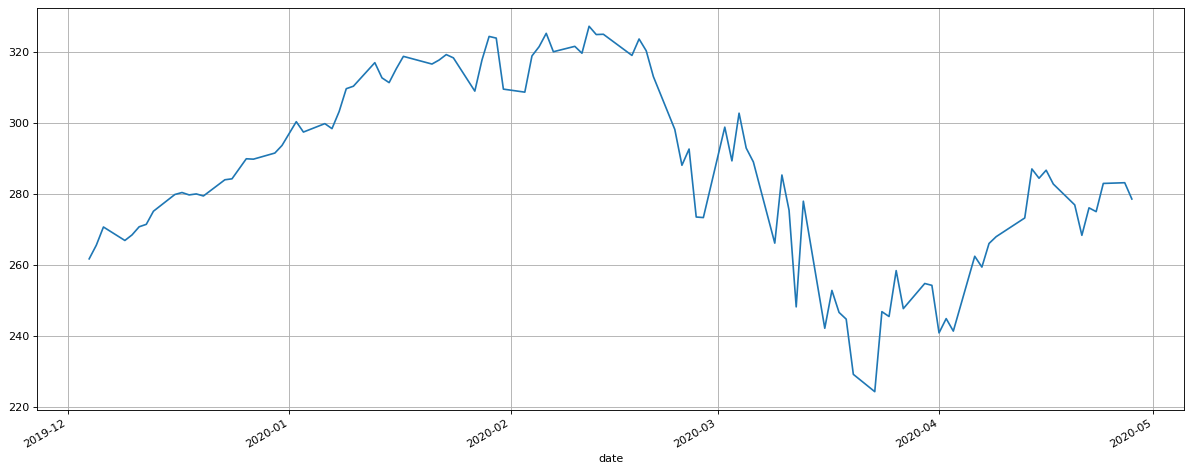

In [1]:
from alpha_vantage.timeseries import TimeSeries 
from alpha_vantage.techindicators import TechIndicators
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

# Your key here
key = 'A0YD8RR1JNNH5Z1G'
# Chose your output format, or default to JSON (python dict)
ts = TimeSeries(key, output_format='pandas', indexing_type='date')
ti = TechIndicators(key, output_format='pandas', indexing_type='date')

# Get the data, returns a tuple
# aapl_data is a pandas dataframe, aapl_meta_data is a dict
aapl_data, aapl_meta_data = ts.get_daily(symbol='AAPL', outputsize='compact')
# aapl_sma is a dict, aapl_meta_sma also a dict
aapl_sma, aapl_meta_sma = ti.get_sma(symbol='AAPL')


# Visualization
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
aapl_data['4. close'].plot()
plt.tight_layout()
plt.grid()
plt.show()

In [2]:
aapl_data['date'] = aapl_data.index
aapl_data.index.name = None
#aapl_data

In [3]:
aapl_sma_50, aapl_meta_sma_50 = ti.get_sma(symbol='AAPL', time_period=50)
#aapl_sma_50.rename({'SMA':'SMA_50'}, axis='columns')
aapl_sma_50['SMA_50']=aapl_sma_50['SMA']
aapl_sma_50.drop(['SMA'], axis=1, inplace = True)
#aapl_sma_50

In [4]:
aapl_sma_200, aapl_meta_sma_200 = ti.get_sma(symbol='AAPL', time_period=200)
aapl_sma_200['SMA_200']=aapl_sma_200['SMA']
aapl_sma_200.drop(['SMA'], axis=1, inplace = True)
#aapl_sma_200

In [5]:
aapl = aapl_data.merge(aapl_sma_50, left_on='date', right_on='date')
aapl = aapl.merge(aapl_sma_200, left_on='date', right_on='date')
aapl

,1. open,2. high,3. low,4. close,5. volume,date,SMA_50,SMA_200
0,285.08,285.83,278.20,278.58,27258610.0,2020-04-28,272.2822,257.0352
1,281.80,284.54,279.95,283.17,29271893.0,2020-04-27,273.2096,256.6588
2,277.20,283.01,277.00,282.97,31627183.0,2020-04-24,274.0436,256.2517
3,275.87,281.75,274.87,275.03,31203582.0,2020-04-23,274.9282,255.8530
4,273.61,277.90,272.20,276.10,29264342.0,2020-04-22,275.8198,255.4840
...,...,...,...,...,...,...,...,...
95,268.60,270.07,265.86,268.48,22632383.0,2019-12-10,250.3808,211.8910
96,270.00,270.80,264.91,266.92,32182645.0,2019-12-09,249.4906,211.4202
97,267.48,271.00,267.30,270.71,26547493.0,2019-12-06,248.5286,210.9568
98,263.79,265.89,262.73,265.58,18661343.0,2019-12-05,247.5122,210.4681


In [6]:
# Marc's AAPL cost
aapl_cost = 260
aapl_date = '2020-03-30'

## Plotly

In [7]:
# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=aapl['date'], y=aapl['4. close'],
                    mode='lines',
                    name='close',
                    line = dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=aapl['date'], y=aapl['SMA_50'],
                    mode='lines',
                    name='50-day SMA',
                    line = dict(color='LightSeaGreen', width=2)))
fig.add_trace(go.Scatter(x=aapl['date'], y=aapl['SMA_200'],
                    mode='lines', 
                    name='200-day SMA',
                    line = dict(color='LightSeaGreen', width=2)))

fig.add_shape(
        # Line Horizontal
            type="line",
            x0='2020-03-30',
            y0=aapl_cost,
            x1='2020-04-28',
            y1=aapl_cost,
            line=dict(color="firebrick", width=2,
            ),
    )

# update layout
fig.update_layout(
    autosize=True,
    # width=800,
    height=600,
    legend_orientation="h",
    showlegend=False,
    # plot_bgcolor='#f4f1f9'
    plot_bgcolor='#f5f0eb'
)

# render slider
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()

In [10]:
import plotly.graph_objects as go

import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)

Running on http://127.0.0.1:8050/
Debugger PIN: 849-118-763
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

## Bokeh plot
- http://docs.bokeh.org/en/1.0.2/docs/user_guide/examples/tools_hover_tooltip_formatting.html
- https://docs.bokeh.org/en/latest/docs/user_guide/tools.html#formatting-tooltip-fields

In [6]:
import numpy as np

from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure

def datetime(x):
    return np.array(x, dtype=np.datetime64)

source = ColumnDataSource(data={
    'date'      : datetime(aapl_data['date']),
    'adj close' : aapl_data['4. close'],
    'volume'    : aapl_data['5. volume'],
})

output_notebook()

p = figure(plot_height=250, x_axis_type="datetime", tools="", toolbar_location=None,
           title="Share price", sizing_mode="scale_width")
p.background_fill_color="#f5f5f5"
p.grid.grid_line_color="white"
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Price'
p.axis.axis_line_color = None

p.line(x='date', y='adj close', line_width=2, color='#ebbd5b', source=source)

p.add_tools(HoverTool(
    tooltips=[
        ( 'date',   '@date{%F}'            ),
        ( 'close',  '$@{adj close}{0.2f}' ), # use @{ } for field names with spaces
        ( 'volume', '@volume{0.00 a}'      ),
    ],

    formatters={
        '@date'        : 'datetime', # use 'datetime' formatter for 'date' field
        'adj close' : 'printf',   # use 'printf' formatter for 'adj close' field
                                  # use default 'numeral' formatter for other fields
    },

    # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline'
))

show(p)

Loading BokehJS ...

## Multi-line Bokeh

https://medium.com/@andrewm4894/bokeh-battles-part-1-multi-line-plots-311109992fdc
https://colab.research.google.com/drive/1N6_NLA5CrYSRSZcudazeIOCtbjf_WSUz

In [7]:
import pandas as pd
import numpy as np
from bokeh.models import ColumnDataSource, HoverTool, Legend
from bokeh.plotting import figure, show
from bokeh.palettes import Category10
import itertools
import random 
import string
from bokeh.io import output_notebook

output_notebook()

def color_gen():
    yield from itertools.cycle(Category10[10])
color = color_gen()

Loading BokehJS ...

In [8]:
def make_data(start_date='2019-01-01',n_data=30,n_num_var=5,n_cat_var=5,n_cat_var_cardinality_upper=10):
    ''' Function to make some data and put it in a df
    '''
    dates = pd.date_range(start_date,periods=n_data)
    df = pd.DataFrame()
    df['date'] = dates
    df = df.set_index(dates)
    for n in range(n_num_var):
        df[f'num_var_{n}'] = np.random.randn(n_data)
    for n in range(n_cat_var):
        cat_vars_generated = np.unique([''.join(random.choices(string.ascii_uppercase + string.digits, k=np.random.randint(2,8))) for i in range(10000)])
        cat_vars_possible = np.random.choice(cat_vars_generated,np.random.randint(1,n_cat_var_cardinality_upper))
        df[f'cat_var_{n}'] = np.random.choice(cat_vars_possible,n_data)
    return df

In [9]:
def plot_lines_multi(df,lw=2,pw=700,ph=400,t_str="hover,save,pan,box_zoom,reset,wheel_zoom",t_loc='above'):
    '''...
    '''
    source = ColumnDataSource(df)
    col_names = source.column_names
    p = figure(x_axis_type="datetime",plot_width=pw, plot_height=ph,toolbar_location=t_loc, tools=t_str)
    p_dict = dict()
    for col, c, col_name in zip(df.columns,color,col_names):
        p_dict[col_name] = p.line('index', col, source=source, color=c,line_width=lw)
        p.add_tools(HoverTool(
            renderers=[p_dict[col_name]],
            tooltips=[('datetime','@index{%Y-%m-%d %H:%M:%S}'),(col, f'@{col}')],
            formatters={'index': 'datetime'}
        ))
    legend = Legend(items=[(x, [p_dict[x]]) for x in p_dict])
    p.add_layout(legend,'right')
    show(p)

In [10]:
output_notebook()
#plot_lines_multi(df._get_numeric_data())
plot_lines_multi(aapl_data.iloc[:,0:4])

Loading BokehJS ...

## hvplot
https://hvplot.holoviz.org/user_guide/Customization.html

In [37]:
import hvplot.pandas
import holoviews as hv

#  set up plot
p1 = aapl.hvplot.line(x = 'date', 
                        y = ['4. close', 'SMA_50', 'SMA_200'], 
                        #hover_cols = ['5. volume'], 
                        legend=False, 
                        grid=True,
                        height = 500).opts(toolbar='above') 

# set up horizontal line
aapl_buy = 260
hline = hv.HLine(aapl_buy)
hline.opts(
    color='red', 
    line_dash='dashed', 
    line_width=2.0,
)

# plot graph
hvplot.show(p1 * hline)